In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline

In [3]:
names = np.loadtxt("sorted_times.txt", delimiter=' ', unpack=True, dtype=str, encoding="utf8", usecols=0)
null_index = np.where(names=="null")
release_mean, release_sd, debug_mean, debug_sd = np.loadtxt("sorted_times.txt", delimiter=' ', unpack=True, dtype=float, usecols=[1,2,3,4])

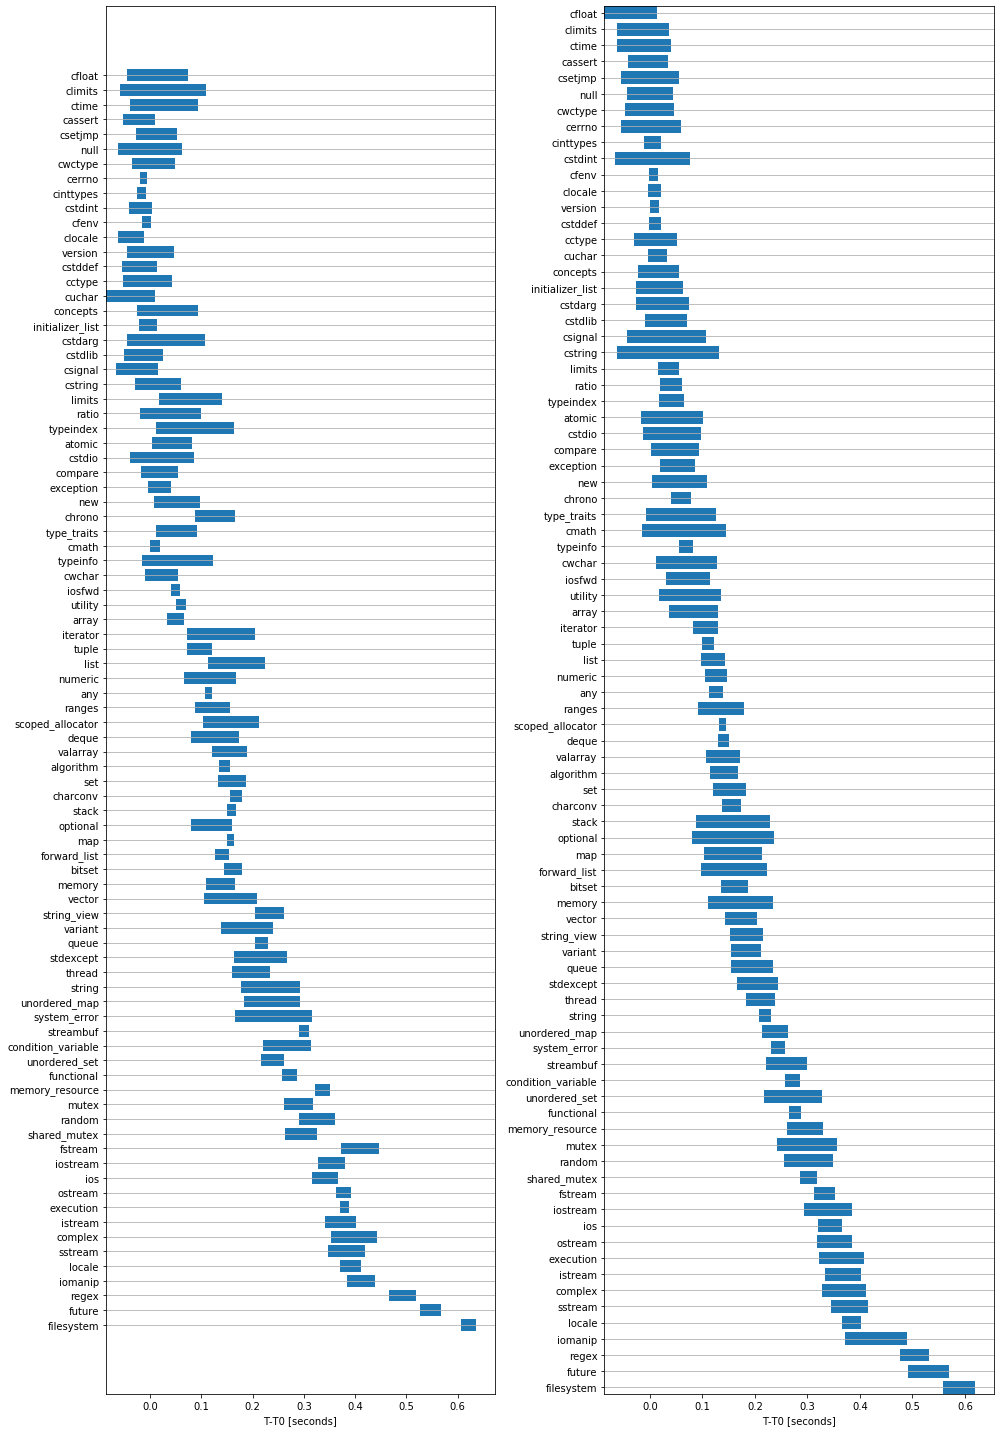

In [5]:
fig = plt.figure(figsize=(14, 20))
y_pos = np.arange(len(names))

def plot_x(ax, means, sds):
    ax.set_xlabel("T-T0 [seconds]")
    ax.grid(axis="y")
    ax.margins(0)
    start_vals = means - means[null_index] - sds/2.0
    _ = ax.barh(y_pos, width=sds, left=start_vals)
    _ = plt.yticks(y_pos, names)

ax = fig.add_subplot(121)
plot_x(ax, debug_mean, debug_sd)

ax = fig.add_subplot(122)
plot_x(ax, release_mean, release_sd)

fig.tight_layout()
mpld3.save_html(fig, "test.html")